<div class="alert alert-block alert-info">
<h3>Student Information</h3> Please provide information about yourself.<br>
<b>Name</b>:<br>
<b>NetID</b>:<br>
<b>Notes to Grader</b> (optional):<br>
<br><br>
<b>IMPORTANT</b>
Your work will not be graded withour your initials below<br>
I certify that this lab represents my own work and I have read the RU academic intergrity policies at<br>
<a href="https://www.cs.rutgers.edu/academic-integrity/introduction">https://www.cs.rutgers.edu/academic-integrity/introduction </a><br>
<b>Initials</b>:     


<h3>Grader Notes</h3>
<b>Your Grade<b>:<br>
<b>Grader Initials</b>:<br>
<b>Grader Comments</b> (optional):<br>
</div>

# Lab 5: Multivariate Linear Regression

### Due Date: Wednesday December 14, 2022 on or before 11:59 PM

In this lab we will work through the process of:
1. implementing a linear regression model
2. defining, implementing and testing multiple loss functions 
3. minimizing loss functions using gradient descent
4. comparing with python library functions
5. Using the model to predict on test data 


## Initialize

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
np.random.seed(42)
plt.style.use('fivethirtyeight')
sns.set()
sns.set_context("talk")
%matplotlib inline

# Univariate Linear Regression
In the first task of the lab, we will model linear regression based on a data set that contains housing data (data/USA_Housing.csv). 

# Task 1 - Initialization
Read the file into a dataframe and keep only the features you need. We will be doing univariate and multivariate regression on housing data.The goal is to find a model that will allow us to predict hosuing prices given certain values.

### Activity 1.1  Read Data

In [2]:
import pandas as pd
df=pd.read_csv('data/USA_Housing.csv', sep=',')
df
df_adjusted =                # keep only the columns "Avg. Area House Age" and "Avg. Area Number of Rooms" and Price

,Avg. Area House Age,Avg. Area Number of Rooms,Price
0,5.682861,7.009188,1.059034e+06
1,6.002900,6.730821,1.505891e+06
2,5.865890,8.512727,1.058988e+06
3,7.188236,5.586729,1.260617e+06
4,5.040555,7.839388,6.309435e+05
...,...,...,...
4995,7.830362,6.137356,1.060194e+06
4996,6.999135,6.576763,1.482618e+06
4997,7.250591,4.805081,1.030730e+06
4998,5.534388,7.130144,1.198657e+06


In [3]:
## Split the data, df_adjusted into training (90%) and testing (10%) using sklearn 
## with random_state = 50 to match this output key25
df_training = 
df_testing =                              # we will be using test data later in this assignment

,Avg. Area House Age,Avg. Area Number of Rooms,Price
3431,5.828143,4.851423,6.129387e+05
2042,6.918945,6.245656,1.347083e+06
79,6.954422,8.516160,1.492011e+06
4663,5.195406,8.368913,1.223915e+06
3640,7.271422,5.685408,1.368692e+06
...,...,...,...
4926,5.367790,7.287304,9.800494e+05
3699,5.128212,7.247376,1.578141e+06
3301,7.398134,7.517189,1.890056e+06
3324,6.901877,7.588075,1.689691e+06


### Activity 1.2 Normalize Data
In this task, you need to normalize df_training data using MinMaxScaler from sklearn.preprocessing. Normalize all df_training data columns to be between 0 and 1. X_scaled_values are the normalized x values of housing data and Y_scaled_values are the scaled values of prices.

In [4]:
### BEGIN ANSWER



### END ANSWER


# call the scaled vectors x and y
x = X_scaled_values
y = Y_scaled_values

In [5]:
x[0]

array([[0.5026345 ],
       [0.28560736],
       [0.3648142 ],
       ...,
       [0.79899389],
       [0.39457287],
       [0.26608873]])

In [6]:
x[1]

array([[0.3073306 ],
       [0.33596457],
       [0.46473142],
       ...,
       [0.32095968],
       [0.35491706],
       [0.35728827]])

In [7]:
y

array([[0.44870955],
       [0.17310412],
       [0.44831884],
       ...,
       [0.5015265 ],
       [0.46460833],
       [0.51405772]])

### Activity 1.3 Plot the feature data to see if a linear regression line is a good fit
It is helpful to understand if the data lends to a linear regression model. In this activity, we will plot the points to see if a line fit to data is reasonable. Plot housing prices vs "Avg. Area House Age" and "Avg. Area Number of Rooms"

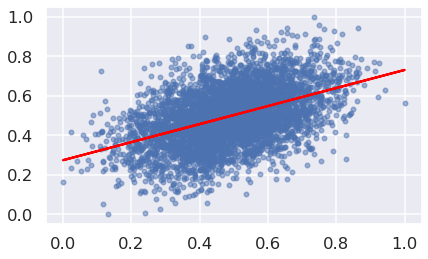

In [8]:
import numpy as np
import matplotlib.pyplot as plt
# plot x = "Avg. Area House Age" and y = price
### BEGIN ANSWER
plt.scatter(x[0],y, alpha=0.5, s=20)

### END ANSWER

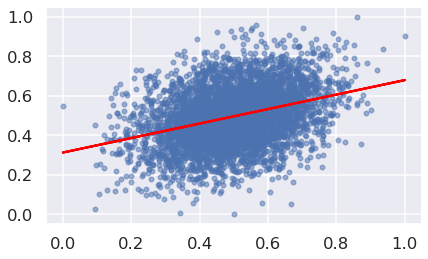

In [9]:
import numpy as np
import matplotlib.pyplot as plt
# plot x = "Avg. Area Number of Rooms" and y = price
### BEGIN ANSWER



### END ANSWER

## Question 1.4
##### BEGIN ANSWER
question: Based on what you see in the plot, do you think it is fine to use linear regression to predict housing prices? Why?


##### END ANSWER

# Task 2 Manual Exploration of Linear Regression Line
In this task we will manually explore the linear regression line for the model x = "Avg. Area House Age" and y = price. This will give us a good intution about the process.
The goal now is to fit a line 
$$
h(\theta) = \theta_0 + \theta_1*x 
$$
to all data points (x,y), such that the L2 error 
$$
 E(\theta) = \sum(h(\theta)-y)^2 $$ is minimized. In this task we will manually change the values of theta0 and theta1 such that we obtain the smallest possible error. 


In [10]:
# define the function h(theta)
def h(theta0, theta1, x):
    """
    Return the model theta0 + theta1*x
    """
    return theta0 + theta1*x

### Activity 2.1 - Define the square loss (L2) function
Define the function, sqerror that computes the error based on the arguments provided. The function h(theta) is as defined above. Assume that x and y are the observed vectors. We use the average square loss or L2 loss in this case. 

In [1]:
import numpy as np

## BEGIN ASNWER
def sqerror(x, y, theta0, theta1):
    """
    Input: parameters theta0 and theta1 of the model
    Input: x, y vectors
    Returns: L2 square error
    Assumptions: none
    """
    
    
## END ANSWER

## testing
print(sqerror(x[0], y, 0.29,0.52))
print(sqerror(x[1], y, 0.29,0.52))

NameError: name 'x' is not defined

### Activity 2.2 - Define the L1 Absolute error function
Define the function, abserror that computes the avarega absolute error based on the arguments provided. The function h(theta) is as defined above. Assume that x and y are the observed vectors. We use the average abssolute error in this case.

In [12]:
import numpy as np
import math

## BEGIN ANSWER
def abserror(x, y, theta0, theta1):
    """
    Input: parameters theta0 and theta1 of the model 
    Input: x, y vectors
    Returns: L1 error
    Assumptions: none
    """
## END ANSWER

## testing
print(abserror(x[0], y, 0.29,0.52))
print(abserror(x[1], y, 0.29,0.52))

0.10961636709557823
0.11777276790770354


### Activity 2.3 - Define the Pseudo Huber loss function
Define the function, huberror that computes the pseudo huber error based on the two arguments provided. The function h(theta) is as defined above. Assume that x and y are the observed vectors. The equation for this function is given by 
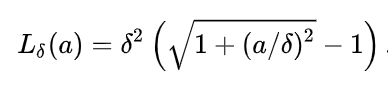
The following function finds the average huber error. In this equation, a  = |h(theta) - y| (see notes for details)

In [13]:
import numpy as np
import math

## BEGIN ANSWER
def huberror(x, y, theta0, theta1, delta):
    """
    Input: parameters theta0, theta1 and delta of the model 
    Input: x, y vectors
    Returns: psuedo huber error
    Assumptions: none
    """
    

## END ANSWER

## testing
print(huberror(x[0], y, 0.29,0.52,0.1))
print(huberror(x[1], y, 0.29,0.52,0.1))

0.005791489779469546
0.0064586775178955965


### Activity 2.4 Interactive Exploration.
Let us initialize the interat widget to create sliders that allows us to change the values of theta0 and theta1 and see how things change. Complete the function f below. The function is expected to get two values theta0 and theta1 and plot both the observed points (x,y) and the regression line on the same plot. It also needs to compute the error and display and error.

In [14]:
from ipywidgets import interact
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


In [15]:
# interactive panel
import pylab
import numpy

def f(theta0, theta1):
    """
    Plot the line and points in an interactive panel
    """
    # plot the line for theta0 and theta1
    y1 = h(theta0, theta1, x[0]) 
    # compose plot
    pylab.plot(x[0],y1) 
    
    # compute the L2 error for theta0 and theta1 for 5 decimal places
    sqerr = round(sqerror(x[0], y, theta0, theta1),6)
    # compute the absolute or L1 error for theta0 and theta1
    abserr = round(abserror(x[0], y, theta0, theta1),4)
    # compute the phub error for theta0 and theta1
    huberr = round(huberror(x[0], y, theta0, theta1, 0.01),4)
    pylab.title('L1=' + str(abserr) + '  L2=' + str(sqerr) + '  hub=' + str(huberr))
    
    # plot the points
    x1 = x[0]   
    y1 = Y_scaled_values
    pylab.scatter(x1, y1, alpha=0.5)
    pylab.show() # show the plot  

interact(f, theta1=(0,1,0.1), theta0=(0,1,0.1));


interactive(children=(FloatSlider(value=0.0, description='theta0', max=1.0), FloatSlider(value=0.0, descriptio…

### Activity 2.5 Record the best values for each error function
Write the "best" values you found for theta0 (y-intercept) and theta1 (slope) and the error. 
This error is the minimum you have observed based on the manual exploration using the widget 
above.

In [16]:
# BEST VALUES FOR AVE SQUARE ERROR
#theta0 =  
#theta1 = 
#error =  
# BEST VALUES FOR AVE ABS ERROR
#theta0 = 
#theta1 = 
#error =  

# BEST VALUES FOR AVE HUBER ERROR
#theta0 = 
#theta1 = 
#error = 

# Task 3 - Gradient Descent - Univariate
In this task we use the Gradient descent methods to find a "better" values for theta0 and theta1 that minimizes the error. Gradient descent is an iterative algorithm. It computes values of theta0 and theta1 in the direction of reaching the minimum point in the error function. The iterative formulas using L2 loss function for theta0 and theta1 are given by:
$$
\theta_0 = \theta_0 - \alpha*(\sum(\theta_1*x^j + \theta_0)-y^j)
$$
$$
\theta_1 = \theta_1 - \alpha*(\sum(\theta_1*x^j + \theta_0 - y^j)*x^j
$$

The alpha is called the "learning rate". $(x^j, y^j)$ is the j-th observation. It is important to pick a good value for alpha so that convergence is not too slow (small alpha) or be at the risk of over shooting the minimum point (large alpha). You may have to experiemnt with few alphas to find something that works.

### Activity 3.1 Compute Parameters using the Gradient Descent algorithm (L2 loss)

Please print out the theta0 and theta1 values for each iteration in your function. You may get different output compare with the sample output depends on your initial theta0 and theta1 values. We will accept any answers which are close to the sample output.

In [17]:
# given the observed data (obsX,obsY), learning rate (alpha), and desired error threshold, 
# the function returns theta0 and theta1 when it reaches the error threshold.
# The convergence is reached when the abs(newError - oldError) is less than the threshold.

# BEGIN ANSWER  
def gd2(obsX, obsY, alpha, threshold):
    """
    Input : observed vectors X, Y, alpha and threshold
    Return theta0, theta1 from Gradient Descent L2 loss algorithm
    Return: Iterations and L2 Error
    """
    
    
    
    
# END ANSWER

[theta0,theta1,newError,iterations] = gd2(x[0],y,0.01,0.0001)
print("Results")
print(iterations, newError)

theta0 = 0.004959119373723783 theta1 = 0.00250130104041613 error =  0.26073377043700924
theta0 = 0.009856509125999328 theta1 = 0.00497212679994247 error =  0.2547531824310393
theta0 = 0.014692934444873428 theta1 = 0.007412854934057795 error =  0.24891992417488215
theta0 = 0.01946915103380873 theta1 = 0.009823858417180984 error =  0.24323036597595663
theta0 = 0.02418590522924592 theta1 = 0.012205505600693153 error =  0.23768096756477516
theta0 = 0.028843934116708974 theta1 = 0.014558160270240643 error =  0.23226827589186305
theta0 = 0.03344396564547098 theta1 = 0.016882181702327755 error =  0.2269889229789619
theta0 = 0.03798671874179899 theta1 = 0.019177924720207913 error =  0.22183962382316785
theta0 = 0.04247290342079487 theta1 = 0.021445739749082197 error =  0.2168171743527077
theta0 = 0.046903220896850076 theta1 = 0.02368597287061356 error =  0.21191844943307028
theta0 = 0.05127836369273132 theta1 = 0.025898965876765375 error =  0.20714040092226926
theta0 = 0.05559901574731396 thet

In [18]:
# observe theta0 and theta1
theta0, theta1

(0.34824282013970514, 0.18072708486410385)

### Activity 3.2 Compute Gradient Descent (Huber)
First Compute a formula for Pseudo huber gradient descent using derivative methods discussed in class and recitation. Similar to L2 descent, use the new formulas (obtained from pseudo huber derivatives) to compute values of theta1, theta1, error. The pseudo huber loss function is provided in Activity 2.3. Use that to differentiate the huber function wrt to theta0 and theta1. 

Please print out the theta0 and theta1 values for each iteration in your function. You may get different output compared with the sample output depending on your initial theta0 and theta1 values. We will accept any answers which are close to the sample output.

In [19]:
# given the observed data (obsX,obsY), learning rate (alpha), and desired error, 
# the function returns theta0, theta1, error and iterations
# that reaches a minimum error threshold

## BEGIN ANSWER

def gdh(obsX, obsY, alpha, threshold, delta):
    """
    Input : observed vectors X, Y, alpha and threshold
    Return theta0, theta1 from Gradient Descent huber loss algorithm
    Return: Iterations and huber Error
    """
    
## END ANSWER
# testing    
[theta0,theta1,error,iterations] = gdh(x[0], y, 0.01, 0.000001, 0.01)
print(iterations, error)

thetas
-0.009993525491263849
-0.0048509455246170665
theta0 = 9.99352549126385e-05 theta1 = 4.850945524617067e-05 error =  0.004859051760204391
theta0 = 0.00019987008284073595 theta1 = 9.701882879128831e-05 error =  0.004857817749631691
theta0 = 0.00029980448141369046 theta1 = 0.0001455281200479318 error =  0.004856583748451816
theta0 = 0.00039973844832530956 theta1 = 0.00019403732843549022 error =  0.0048553497567160936
theta0 = 0.0004996719813347453 theta1 = 0.00024254645338041378 error =  0.0048541157744745244
theta0 = 0.000599605078267365 theta1 = 0.00029105549431646604 error =  0.004852881801775624
theta0 = 0.0006995377370155652 theta1 = 0.0003395644506849745 error =  0.004851647838666572
theta0 = 0.0007994699555395261 theta1 = 0.0003880733219350829 error =  0.004850413885193097
theta0 = 0.00089940173186792 theta1 = 0.00043658210752400405 error =  0.004849179941399411
theta0 = 0.0009993330640985644 theta1 = 0.00048509080691727495 error =  0.0048479460073283165
theta0 = 0.0010992639

### Activity 3.2
1. Write the values of theta0, theta1, alpha, error that provided the minimum value through gradient descent
2. Experiment the new values of theta0, theta1 to see if the interactive widget shows similar things.

##### BEGIN ANSWER



##### END ANSWER

### Activity 3.3 Compare with Library Estimators
Now use the sklearn LinearRegression module to automate this process. What coefficients do you get? Are they close to what you received from gradient descent? Find the error from sklearn package. Is that error smaller or bigger than the squared error you received?

In [20]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
result = lm.fit(x[0],y)
print(result.intercept_)
print(result.coef_)

[0.27432228]
[[0.45661798]]


In [21]:
theta0 = result.intercept_
theta1 = result.coef_
sqerror(x[0],y,theta0,theta1)

0.01661181209114137

# Task 4 - Extending the Model to a Bivariate
In this task we extend the model to predict housing price using two features "$x_1 = $Avg. Area House Age" and "$x_2 = $Avg. Area Number of Rooms". The regression model is then defined by  
$$
y = \theta_2*x_2 + \theta_1*x_1 + \theta_0
$$

## Activity 4.1
We need to estimate the values of $\theta_2, \theta_1, \theta_0$. 
The $\theta_0$ formula is given below (using L2 norm). Using the same formating write the formulas for $\theta_1$ and $\theta_2$. The alpha is called the "learning rate". It is important to pick a good value for alpha so that convergence is not too slow (small alpha) or be at the risk of over shooting the minimum point (large alpha). You may have to experiemnt with few alphas to find something that works. 
Refer to class lectures for more help. 

$$
\theta_0 = \theta_0 - \alpha*1/m*(\sum(\theta_2*x_2^j + \theta_1*x_1^j + \theta_0)-y^j)
$$



/* write equations for $\theta_1$ and $\theta_2$ here */


## Activity 4.2 Compute Parameters using the Gradient Descent Algorithm (L2 loss)
Print out the $\theta_0$, $\theta_1$ and $\theta_2$ values for each iteration in your function. You may get different outputs depends on your initial choice of $\theta_0$, $\theta_1$ and $\theta_2$ values. We will accept any answers which are close to the sample output.

In [22]:
# given the observed data (obsX,obsY), learning rate (alpha), and desired error threshold, 
# the function returns theta0, theta1 and theta2 when it reaches the error threshold.
# The convergence is reached when the abs(newError - oldError) is less than the threshold.

# BEGIN SOLUTION  
def gd22(obsX, obsY, alpha, threshold):
    """
    Input : observed vectors X, Y, alpha and threshold
    Return theta0, theta1, theta2 from Gradient Descent L2 loss algorithm
    Return: Iterations and L2 Error
    """
    
    
    
    
# END ANSWER

[theta0,theta1,theta2, newError,iterations] = gd22(x,y,0.0001,0.0001)
print(iterations, newError)

theta0 = 0.004959119373723783 theta1 = 0.00250130104041613 theta2 = 0.002539051820932265 error =  0.2594617686038213
theta0 = 0.009843844010007402 theta1 = 0.0049659814234737625 theta2 = 0.005040542097256903 error =  0.25227718633717944
theta0 = 0.014655282932420547 theta1 = 0.007394586925502366 theta2 = 0.007505030718281583 error =  0.24530518067694573
theta0 = 0.019394528632929352 theta1 = 0.00978765518726657 theta2 = 0.009933069227355942 error =  0.2385394613422675
theta0 = 0.02406265731832375 theta1 = 0.012145715835238463 theta2 = 0.012325200946280137 error =  0.2319739241859855
theta0 = 0.028660729152971468 theta1 = 0.0144692906010622 theta2 = 0.014681961097858846 error =  0.22560264568681157
theta0 = 0.03318978849795348 theta1 = 0.01675889343923775 theta2 = 0.017003876926628497 error =  0.21941987760448536
theta0 = 0.03765086414663482 theta1 = 0.019015030643050483 theta2 = 0.019291467817784867 error =  0.21342004179309002
theta0 = 0.04204496955672379 theta1 = 0.021238200958772567

Write the values of thetas obtained from function above.
$$\theta_0 =$$ 
$$\theta_1 =$$ 
$$\theta_2 =$$ 
and write the model 
$$
y = \theta_2*x_2 + \theta_1*x_1 + \theta_0
$$

## Activity 4.3 Compare Coefficients with Library Estimators
Now use the sklearn LinearRegression module to automate the process of finding coefficients. 

In [23]:
# fit a regression model
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
# assume
Y = y
X = np.stack(x)
X = X.reshape(2, -1).T
Y = Y.reshape(-1)

model = LinearRegression().fit(X, Y)

print(model.coef_)
print(model.intercept_)

[0.45718158 0.36702939]
0.09096981082366068


What coefficients do you get? Are they close to what you received from gradient descent? ]Is that error smaller or bigger than the squared error you received?

##### Begin Answer


##### End Answer

## Activity 4.4.1 - Predict the Housing Price using test set data - gradient descent
Use the test set to find the estimated value of the home $y$ using coefficients received from gradient descent. Defined the average error as 1/m * $\sum$ abs(predicted - actual) where m is the size of the test data set.

In [24]:
## Begin ANSWER


## End ANSWER
error_gd = print(abs(error_gs))

0.14308667764677446


## Activity 4.4.2 - Predict the Housing Price using test set data - library estimator
Use the test set to find the estimated value of the home $y$ using coefficients received from library estimators. Defined the averge error as 1/m * $\sum$ abs(predicted - actual) where m is the size of the test data set.

In [25]:
## Begin ANSWER


## End ANSWER
error_lib = print(abs(error_lib))

0.12166769680633199


## Activity 4.4.3
Compare the performance of Gradient Descent and Library Estimators. Briefly explain your observations and if there are significant descrepancies, explain them in your words. Do you think either model would be a reasonable model for predicting home prices for new homes on the market? Why or Why not.

### begin answer

### end answer

### Feedback
Please provide feedback on this lab.
* how would you rate this lab (from 1-lowest, 10-highest) :
* how can we improve his lab? :

<div class="alert alert-block alert-info">
<h2>Submission Instructions</h2> 
<b> File Name:</b> Please name the file as your_section_your_netID_lab5.jpynb<br>
<b> Submit To: </b> codebench <br>
<b>Warning:</b> Failure to follow directions may result in loss points.<br>
</div>

@2022 All Rights Reserved. Lab Developed by A.D. Gunawardena for CS 439. DO NOT post a copy of this lab or solutions in public space such as github or on commercial sites. 